In [1]:
import numpy as np
from queue import PriorityQueue

class State:
    def __init__(self, state, parent):
        self.state = state
        self.parent = parent

    def __lt__(self, other):
        return False  # Define a default comparison method

class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state


    def print_state(self, state):
        print(state[:, :])

    def is_goal(self, state):
        return np.array_equal(state, self.goal_state)

    def get_possible_moves(self, state):
        possible_moves = []
        zero_pos = np.where(state == 0)
        directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Left, Right, Up, Down
        for direction in directions:
            new_pos = (zero_pos[0] + direction[0], zero_pos[1] + direction[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:  # Check boundaries
                new_state = np.copy(state)
                new_state[zero_pos], new_state[new_pos] = new_state[new_pos], new_state[zero_pos]  # Swap
                possible_moves.append(new_state)
        return possible_moves

    def heuristic(self, state):
         return np.count_nonzero(state != self.goal_state)


    def solve(self):
        queue = PriorityQueue()
        initial_state = State(self.initial_state, None)
        queue.put((0, initial_state))  # Put State object in queue
        visited = set()

        while not queue.empty():
            priority, current_state = queue.get()
            if self.is_goal(current_state.state):
                return current_state  # Return final state
            for move in self.get_possible_moves(current_state.state):
                move_state = State(move, current_state)  # Create new State for move
                if str(move_state.state) not in visited:
                    visited.add(str(move_state.state))
                    priority = self.heuristic(move_state.state)
                    queue.put((priority, move_state))  # Put State object in queue
        return None

# Test the function
initial_state = np.array([[2, 8, 1], [0, 4, 3], [7, 6, 5]])
goal_state = np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]])
puzzle = Puzzle(initial_state, goal_state)
solution = puzzle.solve()
move1 = -1
if solution is not None:
    moves = []
    while solution is not None:  # Go through parents to get moves
        moves.append(solution.state)
        solution = solution.parent
    for move in reversed(moves): 
        move1+=1 # Print moves in correct order
        puzzle.print_state(move)
    print("no of moves: ",move1)
else:
    print("No solution found.")

[[2 8 1]
 [0 4 3]
 [7 6 5]]
[[2 8 1]
 [4 0 3]
 [7 6 5]]
[[2 0 1]
 [4 8 3]
 [7 6 5]]
[[2 1 0]
 [4 8 3]
 [7 6 5]]
[[2 1 3]
 [4 8 0]
 [7 6 5]]
[[2 1 3]
 [4 0 8]
 [7 6 5]]
[[2 1 3]
 [0 4 8]
 [7 6 5]]
[[0 1 3]
 [2 4 8]
 [7 6 5]]
[[1 0 3]
 [2 4 8]
 [7 6 5]]
[[1 4 3]
 [2 0 8]
 [7 6 5]]
[[1 4 3]
 [2 8 0]
 [7 6 5]]
[[1 4 0]
 [2 8 3]
 [7 6 5]]
[[1 0 4]
 [2 8 3]
 [7 6 5]]
[[1 8 4]
 [2 0 3]
 [7 6 5]]
[[1 8 4]
 [2 3 0]
 [7 6 5]]
[[1 8 0]
 [2 3 4]
 [7 6 5]]
[[1 0 8]
 [2 3 4]
 [7 6 5]]
[[1 3 8]
 [2 0 4]
 [7 6 5]]
[[1 3 8]
 [0 2 4]
 [7 6 5]]
[[0 3 8]
 [1 2 4]
 [7 6 5]]
[[3 0 8]
 [1 2 4]
 [7 6 5]]
[[3 8 0]
 [1 2 4]
 [7 6 5]]
[[3 8 4]
 [1 2 0]
 [7 6 5]]
[[3 8 4]
 [1 0 2]
 [7 6 5]]
[[3 0 4]
 [1 8 2]
 [7 6 5]]
[[0 3 4]
 [1 8 2]
 [7 6 5]]
[[1 3 4]
 [0 8 2]
 [7 6 5]]
[[1 3 4]
 [8 0 2]
 [7 6 5]]
[[1 3 4]
 [8 2 0]
 [7 6 5]]
[[1 3 0]
 [8 2 4]
 [7 6 5]]
[[1 0 3]
 [8 2 4]
 [7 6 5]]
[[1 2 3]
 [8 0 4]
 [7 6 5]]
no of moves:  31


In [3]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Use only the first two features (sepal length and sepal width)
X = iris.data[:, :2]
y = (iris.target != 0) * 1  # Binary classification (0 or 1)

# Calculate and print the required information
num_features = X.shape[1]  # Number of features
num_instances = X.shape[0]  # Number of instances
num_numerical_data = X.size  # Total numerical data (instances * features)
num_categorical_data = 0  # No categorical data in this dataset
target_variable_name = "target"  # Name of the target variable

# Print results
print(f"Number of features: {num_features}")
print(f"Number of instances: {num_instances}")
print(f"Number of numerical data: {num_numerical_data}")
print(f"Number of categorical data: {num_categorical_data}")
print(f"Name of target variable: {target_variable_name}")


Number of features: 2
Number of instances: 150
Number of numerical data: 300
Number of categorical data: 0
Name of target variable: target


## Tic Tac Toe

In [ ]:
def print_board(board):
    for row in board:
        print(" | ".join(row))
    print()

def is_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_full(board):
    return all(board[i][j] != " " for i in range(3) for j in range(3))

def is_terminal(board):
    return is_winner(board, "X") or is_winner(board, "O") or is_full(board)

def get_empty_cells(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == " "]

def dfs(board, depth, maximizing_player):
    if is_winner(board, "X"):
        return -1
    elif is_winner(board, "O"):
        return 1
    elif is_full(board):
        return 0

    if maximizing_player:
        max_eval = float("-inf")
        for i, j in get_empty_cells(board):
            board[i][j] = "O"
            eval = dfs(board, depth + 1, False)
            board[i][j] = " "
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float("inf")
        for i, j in get_empty_cells(board):
            board[i][j] = "X"
            eval = dfs(board, depth + 1, True)
            board[i][j] = " "
            min_eval = min(min_eval, eval)
        return min_eval


def find_best_move(board):
    best_val = float("-inf")
    best_move = None

    for i, j in get_empty_cells(board):
        board[i][j] = "O"
        move_val = dfs(board, 0, False)
        board[i][j] = " "

        if move_val > best_val:
            best_move = (i, j)
            best_val = move_val

    return best_move


def play_tic_tac_toe():
    board = [[" " for _ in range(3)] for _ in range(3)]

    while not is_terminal(board):
        print_board(board)
        player_row = int(input("Enter the row (0, 1, or 2): "))
        player_col = int(input("Enter the column (0, 1, or 2): "))

        if board[player_row][player_col] == " ":
            board[player_row][player_col] = "X"
        else:
            print("Cell already taken. Try again.")
            continue

        if is_terminal(board):
            break

        print("Your move:")
        print_board(board)
        print("Computer's move:")
        computer_move = find_best_move(board)
        board[computer_move[0]][computer_move[1]] = "O"

    print_board(board)
    if is_winner(board, "X"):
        print("You win!")
    elif is_winner(board, "O"):
        print("Computer wins!")
    else:
        print("It's a draw!")

play_tic_tac_toe()


## Alpha-Beta prunig

In [5]:
MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):
    if 2**depth >= len(values):
        return values[nodeIndex]

    if maximizingPlayer:
        best = MIN
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)
            # Alpha Beta Pruning
            if beta <= alpha:
                break
        return best

    else:
        best = MAX
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)
            # Alpha Beta Pruning
            if beta <= alpha:
                break
        return best


values =  [3, 5, 6, 9, 1, 2, 8,6,1,8,6,2,3,4,2,5]
print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))

The optimal value is : 6


## A*

In [30]:
# Prints the sequence of moves to reach the goal state from the initial state
def print_data(state):
	for row in state:
		print(",".join(map(str, row)))
	print("---------")
	

# Finds the blank tile in the current state
def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j

def make_move(state, di, dj):
    i, j = find_blank(state)
    if 0 <= i + di < 3 and 0 <= j + dj < 3:
        new_state = [list(row) for row in state]
        new_state[i][j], new_state[i + di][j + dj] = (
            new_state[i + di][j + dj],
            new_state[i][j],
        )
        return new_state
    else:
        return None


def calculate_heuristic(state, goal):
    return sum(state[i][j] != goal[i][j] for i in range(3) for j in range(3))

def a_star(initial_state, goal_state):

    # The open set is a priority queue which has the elements in the following format:
    # (f, g, current_state, moves)
    # it contains those states that are scheduled for exploration
    open_set = [(calculate_heuristic(initial_state, goal_state), 0, initial_state, [])]

    # closed set is the set of states that have already been visited
    # these states are not revisited
    closed_set = set()

    while open_set:
        open_set.sort()  # Sort the open set based on the heuristic value

        # f is the heuristic value of the state
        # g is the cost to reach the current state from the initial state
        # current_state is the current state of the system
        # moves is the sequence of moves to reach the current state from the initial state
        f, g, current_state, moves = open_set.pop(0)
        closed_set.add(tuple(map(tuple, current_state)))

        print_data(current_state)
        print()

        if current_state == goal_state:
            print("System has reached the goal state")
            print("Sequence of moves:", moves)
            return

        successors = [
            (make_move(current_state, -1, 0), "up"),
            (make_move(current_state, 1, 0), "down"),
            (make_move(current_state, 0, -1), "left"),
            (make_move(current_state, 0, 1), "right"),
        ]

        successors = [
            (state, move)
            for state, move in successors
            if state is not None and tuple(map(tuple, state)) not in closed_set
        ]

        for successor, move in successors:
            h = calculate_heuristic(successor, goal_state)
            g_successor = g + 1
            f_successor = g_successor + h
            open_set.append((f_successor, g_successor, successor, moves + [move]))


# Example usage:
initial_state = [[2, 8, 1], [0, 4, 3], [7, 6, 5]]
goal_state = [[1, 2, 3], [8, 0, 4], [7, 6, 5]]
a_star(initial_state, goal_state)

2,8,1
0,4,3
7,6,5
---------

2,8,1
4,0,3
7,6,5
---------

0,8,1
2,4,3
7,6,5
---------

2,8,1
7,4,3
0,6,5
---------

2,0,1
4,8,3
7,6,5
---------

2,8,1
4,3,0
7,6,5
---------

8,0,1
2,4,3
7,6,5
---------

0,2,1
4,8,3
7,6,5
---------

8,4,1
2,0,3
7,6,5
---------

2,8,1
4,6,3
7,0,5
---------

2,1,0
4,8,3
7,6,5
---------

2,8,0
4,3,1
7,6,5
---------

8,1,0
2,4,3
7,6,5
---------

2,1,3
4,8,0
7,6,5
---------

4,2,1
0,8,3
7,6,5
---------

4,2,1
8,0,3
7,6,5
---------

8,1,3
2,4,0
7,6,5
---------

8,1,3
2,0,4
7,6,5
---------

2,1,3
4,0,8
7,6,5
---------

2,8,1
7,4,3
6,0,5
---------

2,8,1
4,3,5
7,6,0
---------

2,8,1
7,0,3
6,4,5
---------

2,0,8
4,3,1
7,6,5
---------

8,4,1
0,2,3
7,6,5
---------

8,4,1
2,3,0
7,6,5
---------

0,2,8
4,3,1
7,6,5
---------

0,4,1
8,2,3
7,6,5
---------

2,3,8
4,0,1
7,6,5
---------

4,2,1
8,3,0
7,6,5
---------

8,0,3
2,1,4
7,6,5
---------

8,1,3
0,2,4
7,6,5
---------

0,1,3
8,2,4
7,6,5
---------

1,0,3
8,2,4
7,6,5
---------

1,2,3
8,0,4
7,6,5
---------

System has rea

## Hill climbing

In [8]:
import numpy as np

def hill_climbing(func, start, step_size=0.01, max_iterations=1000):
    current_position = start
    current_value = func(current_position)
    
    for i in range(max_iterations):
        next_position_positive = current_position + step_size
        next_value_positive = func(next_position_positive)
        
        next_position_negative = current_position - step_size
        next_value_negative = func(next_position_negative)
        
        if next_value_positive > current_value and next_value_positive >= next_value_negative:
            current_position = next_position_positive
            current_value = next_value_positive
        elif next_value_negative > current_value and next_value_negative > next_value_positive:
            current_position = next_position_negative
            current_value = next_value_negative
        else:
            break
    
    return current_position, current_value

# Get the function from the user
while True:
    func_str = input("\nEnter a function of x: ")
    try:
        # Test the function with a dummy value
        x = 0
        eval(func_str)
        break
    except Exception as e:
        print(f"Invalid function. Please try again. Error: {e}")

# Convert the string into a function
func = lambda x: eval(func_str)

# Get the starting point from the user
while True:
    start_str = input("\nEnter the starting value to begin the search: ")
    try:
        start = float(start_str)
        break
    except ValueError:
        print("Invalid input. Please enter a number.")

maxima, max_value = hill_climbing(func, start)
print(f"The maxima is at x = {maxima}")
print(f"The maximum value obtained is {max_value}")


Enter a function of x:  -x**3+10*x+5

Enter the starting value to begin the search:  3


The maxima is at x = 1.8300000000000212
The maximum value obtained is 17.171512999999997


## Naive bayes

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

class NaiveBayes:
    def fit(self, X, y):
        self._classes = np.unique(y)
        self._mean = np.array([X[y == c].mean(axis=0) for c in self._classes])
        self._var = np.array([X[y == c].var(axis=0) for c in self._classes])
        self._priors = np.array([X[y == c].shape[0] / len(y) for c in self._classes])

    def predict(self, X):
        y_pred=[self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = [np.log(prior) + np.sum(np.log(self._pdf(idx, x)))
                      for idx, prior in enumerate(self._priors)]
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean, var = self._mean[class_idx], self._var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Create and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)
print('Accuracy: %.4f' % np.mean(y_pred == y_test))
# Print class names instead of class numbers
print("Predictions:", class_names[y_pred])



### Optional confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 1.0000
Predictions: ['virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica']

Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## KNN

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter


# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = []
        for x_train in self.X_train:
            distances.append(np.linalg.norm(x - x_train)) 
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        #print(most_common)
        return most_common[0][0]

# Create a k-NN classifier with 3 neighbors
knn = KNN(k=3)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)
print('Accuracy: %.4f' % np.mean(y_pred == y_test))
print("Predictions:", class_names[y_pred])


# Optional confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Predictions: ['virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica']

Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## K-Means

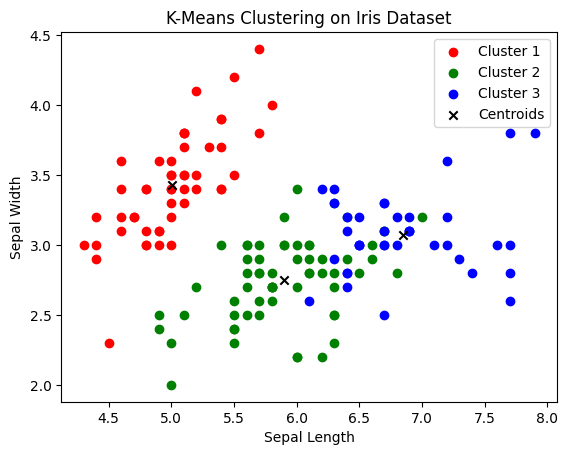

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)

def kmeans(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(100):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    return centroids, labels

# Apply custom k-means clustering
k = 3
centroids, labels = kmeans(X, k)

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Plot the original data points with different colors for each cluster
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')

# Plot the final cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', label='Centroids')

plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.savefig('plot.png')
plt.show()


## Logistic Regression

Accuracy: 1.0000


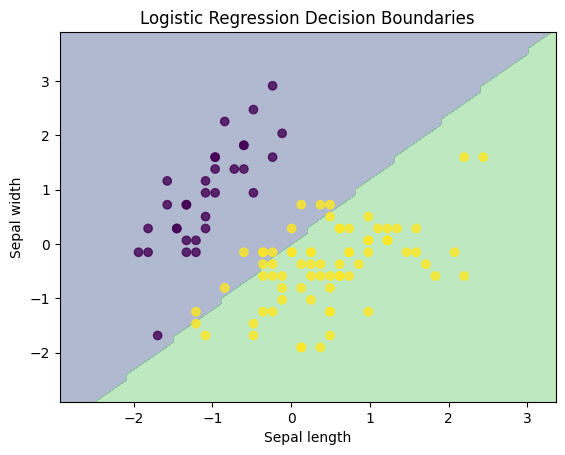

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and width)
y = (iris.target != 0) * 1  # Convert to binary classification

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_regression(X, y, num_iterations=200, learning_rate=0.001):
    weights = np.zeros(X.shape[1])
    for _ in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient_val = np.dot(X.T, (h - y)) / y.shape[0]
        weights -= learning_rate * gradient_val
    return weights


# Perform logistic regression
weights = logistic_regression(X_train_std, y_train)

# Make predictions
y_pred = sigmoid(np.dot(X_test_std, weights)) > 0.5

# Print accuracy
print(f'Accuracy: {np.mean(y_pred == y_test):.4f}')


# Plot decision boundary
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights)) > 0.5
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, alpha=0.8)
plt.title('Logistic Regression Decision Boundaries')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.savefig('plot.png')
plt.show()